In [1]:
import pandas as pd
df=pd.read_csv('Preprocessed.csv')
df.head(3)

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month,day
0,-17.0503,-74.0580,30.94,4.6,1,12,183.0,4.973,0.83,3,...,15.2,10.5,0.146,14,1,15,23,2020,12,31
1,-39.3139,-72.0545,107.55,4.8,11,12,52.0,0.389,1.10,3,...,4.0,3.9,0.093,11,1,15,23,2020,12,29
2,-34.3785,-70.8291,92.47,4.6,10,12,44.0,0.211,0.96,3,...,3.5,3.8,0.143,8,1,15,6,2020,12,29


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')
X = df.drop("mag", axis=1)
y = df["mag"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [3]:
sc = RobustScaler()

X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [4]:
#LSTM for regression
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
look_back = 1
#create and fit our data to the LSTM network
model = Sequential()
model.add(LSTM(15, input_shape=(23, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=15, batch_size=28, verbose=1)

Epoch 1/15
1635/1635 [==============================] - 19s 10ms/step - loss: 0.8483
Epoch 2/15
1635/1635 [==============================] - 16s 10ms/step - loss: 0.2437
Epoch 3/15
1635/1635 [==============================] - 17s 11ms/step - loss: 0.2220
Epoch 4/15
1635/1635 [==============================] - 16s 10ms/step - loss: 0.2080
Epoch 5/15
1635/1635 [==============================] - 16s 10ms/step - loss: 0.2015
Epoch 6/15
1635/1635 [==============================] - 17s 10ms/step - loss: 0.1943
Epoch 7/15
1635/1635 [==============================] - 17s 10ms/step - loss: 0.1893
Epoch 8/15
1635/1635 [==============================] - 16s 10ms/step - loss: 0.1857
Epoch 9/15
1635/1635 [==============================] - 16s 10ms/step - loss: 0.1821
Epoch 10/15
1635/1635 [==============================] - 17s 10ms/step - loss: 0.1783
Epoch 11/15
1635/1635 [==============================] - 16s 10ms/step - loss: 0.1760
Epoch 12/15
1635/1635 [==============================] - 16s 10

In [6]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
y_pred = model.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))
print("R2 Score: ", r2_score(y_test,y_pred))

358/358 [==============================] - 2s 5ms/step
Mean Squared Error:  0.16399592635492546
R2 Score:  0.6927251712722591


In [7]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test,y_pred)

print("LSTM Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

LSTM Results of sklearn.metrics:
MAE: 0.3027878699238495
MSE: 0.16399592635492546
RMSE: 0.40496410502034064
R-Squared: 0.6927251712722591


In [8]:
# Create a DataFrame with actual and predicted magnitude values
y_pred = y_pred.flatten()
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Store the DataFrame in an Excel file
result_df.to_excel('magnitude_predictions.xlsx', index=False)


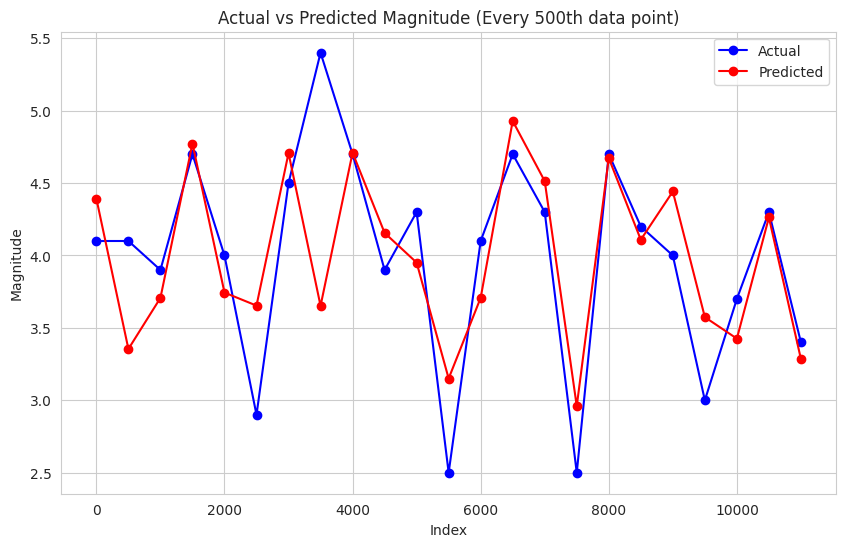

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
predictions = pd.read_excel('magnitude_predictions.xlsx')

# Plotting every nth data point
n = 500 # Change this value as needed
plt.figure(figsize=(10, 6))
plt.plot(predictions.index[::n], predictions['Actual'][::n], marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(predictions.index[::n], predictions['Predicted'][::n], marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Actual vs Predicted Magnitude (Every {}th data point)'.format(n))
plt.legend()
plt.grid(True)
plt.show()
